In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
model = ResNet50(weights='imagenet')

2021-09-01 13:40:12.557075: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-01 13:40:12.557131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adelarja-Inspiron-7373): /proc/driver/nvidia/version does not exist
2021-09-01 13:40:12.558293: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
img_path = r'/home/adelarja/Downloads/pug.jpg'

In [5]:
import matplotlib.pyplot as plt

In [6]:
from skimage.io import imread

In [7]:
img = imread(img_path)

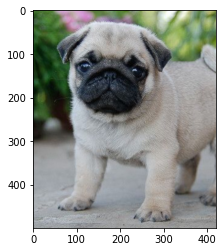

In [8]:
plt.imshow(img)

In [9]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

2021-09-01 13:40:23.047095: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


49152/35363 [=========================================] - 0s 1us/step
Predicted: [('n02110958', 'pug', 0.983976), ('n02112706', 'Brabancon_griffon', 0.00935943), ('n02108915', 'French_bulldog', 0.0022775384)]
